In [ ]:
!pip install tensorflow

In [ ]:
!pip install Keras

# Загрузка датасета

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

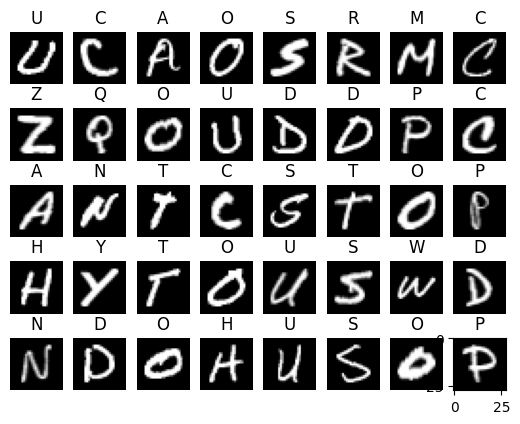

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')

# Моделирование нейронной сети

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Компиляция модели

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Подготовка данных

In [ ]:
x_train.shape

(297960, 784)

In [ ]:
x_test.shape

(74491, 784)

In [ ]:
# изменение формы тензора
x_train = x_train.reshape((297960, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_train = x_train.astype('float32') / 255

# изменение формы тензора
x_test = x_test.reshape((74491, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 26) # Кодируем обучающие метки на 26 классов
y_test = to_categorical(y_test, 26)   # Кодируем тестовые метки на 26 классов

# Обучение и оценка модели

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8836 - loss: 0.4344 - val_accuracy: 0.9689 - val_loss: 0.1139
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9728 - loss: 0.0974 - val_accuracy: 0.9761 - val_loss: 0.0877
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9824 - loss: 0.0627 - val_accuracy: 0.9817 - val_loss: 0.0694
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9875 - loss: 0.0455 - val_accuracy: 0.9847 - val_loss: 0.0602
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9901 - loss: 0.0348 - val_accuracy: 0.9854 - val_loss: 0.0589


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9851 - loss: 0.0629
Точность на тестовом образце: 0.9854344725608826
Потери на тестовом образце: 0.05893894284963608


# Предсказание

In [ ]:
import numpy as np

# Выбор нужной картинки из тестовой выборки
n = 127
x = x_test[n]

# Проверка формы данных
print(x.shape)

(784,)


In [ ]:
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 26 чисел
print(f'Вектор результата на 26 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана буква: {word_dict[pred]}')
print(f'Правильное значение: {word_dict[np.argmax(y_test[n])]}')

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Вектор результата на 26 выходных нейронах: [[2.9018602e-12 6.4424312e-12 2.4399144e-11 9.0943739e-11 2.3253827e-07
  1.9223736e-09 5.0034873e-07 1.0011284e-12 5.4955080e-07 1.6912776e-05
  4.4201522e-12 1.0492581e-11 6.9953822e-19 9.8988764e-13 8.8324757e-11
  3.8240225e-13 2.3073293e-08 5.4661673e-17 9.9998176e-01 1.3380024e-13
  1.5679180e-10 5.5996917e-13 1.1502527e-14 1.1252871e-09 1.0043693e-10
  3.0350288e-11]]
Распознана буква: S
Правильное значение: S


# Визуализация процесса обучения

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

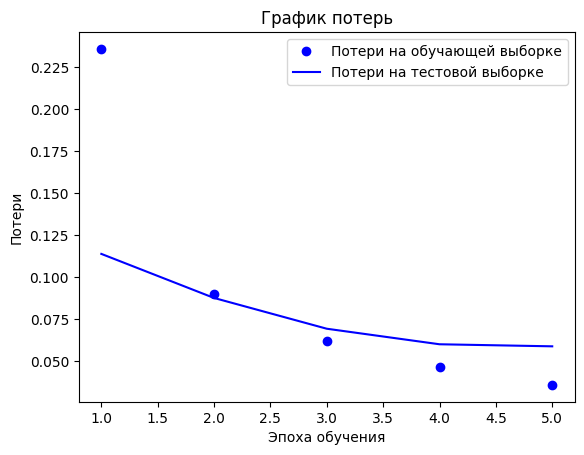

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

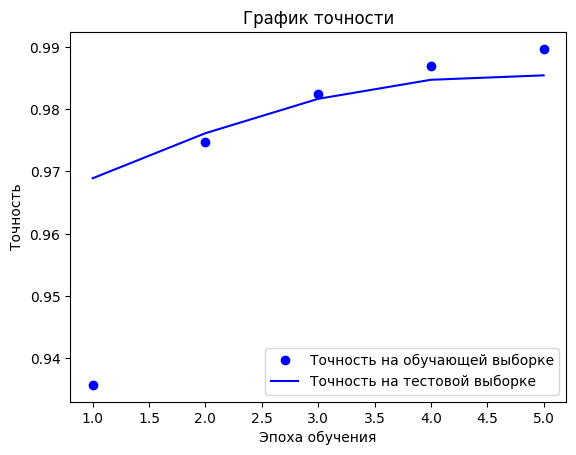

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

Судя по графикам потерь и точности, модель в состоянии недообученности, так как нет спада точности на тестовой выборке, следовательно, модель не достигла эффекта переобучения. Попробуем увеличить число эпох с 5 до 10.

# Дообучение

In [ ]:
history_additional = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9922 - loss: 0.0270 - val_accuracy: 0.9825 - val_loss: 0.0707
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9938 - loss: 0.0214 - val_accuracy: 0.9872 - val_loss: 0.0548
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9951 - loss: 0.0167 - val_accuracy: 0.9872 - val_loss: 0.0553
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.9898 - val_loss: 0.0480
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9970 - loss: 0.0097 - val_accuracy: 0.9905 - val_loss: 0.0481


In [ ]:
# Объединение истории обучения
history.history['loss'].extend(history_additional.history['loss'])
history.history['accuracy'].extend(history_additional.history['accuracy'])
history.history['val_loss'].extend(history_additional.history['val_loss'])
history.history['val_accuracy'].extend(history_additional.history['val_accuracy'])

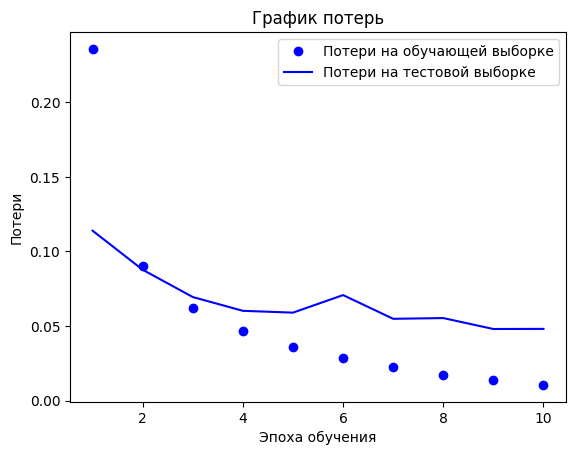

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

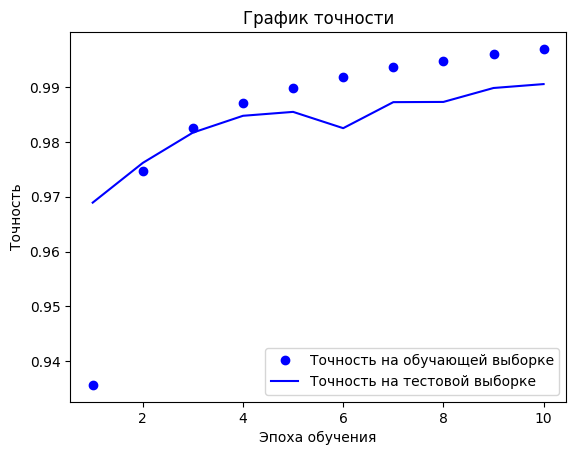

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0502
Точность на тестовом образце: 0.990495502948761
Потери на тестовом образце: 0.048050541430711746


In [ ]:
model.save('handwritten_detector.h5')

In [ ]:
from google.colab import files
files.download('handwritten_detector.h5')

Судя по результатам обучения на 10 эпохах, можно предположить, что эффект переобучения достигается на 9-ой эпохе. При этом модель получила точность в 98.8 % на тестовом наборе. Попробуем запредиктить несколько букв.

# Финальная проверка


(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Вектор результата на 26 выходных нейронах: [[6.9811855e-29 2.6794237e-18 8.0284358e-13 5.7496656e-15 6.2925665e-11
  5.6927847e-17 2.9377309e-21 7.8634136e-24 1.6477359e-13 2.2085216e-24
  2.7109778e-10 1.0000000e+00 3.7284144e-22 7.9508493e-18 2.7324591e-25
  1.9355081e-30 1.4650672e-22 6.3794328e-18 3.4863723e-18 1.0263339e-23
  1.3674210e-09 2.2970417e-17 1.9912528e-20 3.1709197e-16 5.4553875e-19
  1.6211545e-16]]


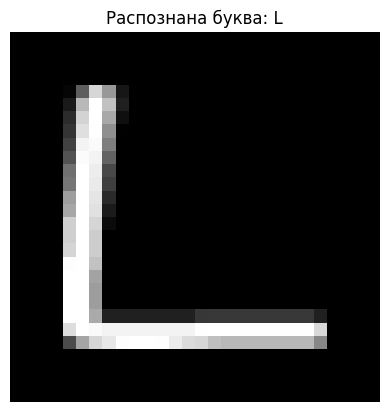

Правильное значение: L


In [ ]:
# Выбор нужной картинки из тестовой выборки
n = 135
x = x_test[n]

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 26 чисел
print(f'Вектор результата на 26 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)

# Отображение картинки
plt.imshow(x.reshape(28, 28), cmap='gray')  # Преобразование в 2D массив 28x28
plt.title(f'Распознана буква: {word_dict[pred]}')
plt.axis('off')  # Отключение осей для лучшего отображения
plt.show()

print(f'Правильное значение: {word_dict[np.argmax(y_test[n])]}')

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Вектор результата на 26 выходных нейронах: [[3.32968944e-26 7.14549253e-12 2.14546092e-09 7.97466648e-10
  3.79262680e-12 4.20307296e-11 1.17518517e-09 3.26230587e-22
  1.20703327e-04 1.25575904e-02 2.83011120e-18 8.00372220e-07
  1.44110631e-20 3.13255200e-18 2.42423913e-14 4.61608940e-24
  3.39843292e-11 1.95214401e-26 9.87320900e-01 2.06412470e-12
  1.13087074e-11 2.23911432e-14 1.39183056e-15 7.12208206e-14
  5.08254328e-09 8.77888094e-13]]


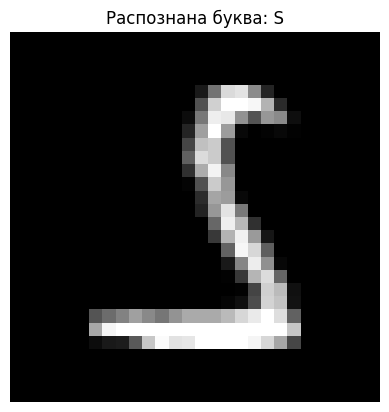

Правильное значение: S


In [ ]:
# Выбор нужной картинки из тестовой выборки
n = 2153
x1 = x_test[n]

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x1 = np.expand_dims(x1, axis=0)

# Проверка формы данных
print(x1.shape)

# Предсказываем выбранную картинку
prediction1 = model.predict(x1)

# Вывод результата - вектор из 26 чисел
print(f'Вектор результата на 26 выходных нейронах: {prediction1}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred1 = np.argmax(prediction1)

# Отображение картинки
plt.imshow(x1.reshape(28, 28), cmap='gray')  # Преобразование в 2D массив 28x28
plt.title(f'Распознана буква: {word_dict[pred1]}')
plt.axis('off')  # Отключение осей для лучшего отображения
plt.show()

print(f'Правильное значение: {word_dict[np.argmax(y_test[n])]}')

(1, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Вектор результата на 26 выходных нейронах: [[2.94448768e-19 1.25019385e-12 1.00000000e+00 1.54210000e-12
  1.27678161e-08 4.24945530e-11 8.35182895e-11 3.89977995e-22
  5.84249454e-11 2.16679109e-14 2.63139879e-12 2.92544722e-09
  1.10591825e-18 1.11504765e-17 1.41451970e-08 1.31552224e-17
  5.71470996e-12 5.37224820e-10 3.60549118e-10 3.44844426e-14
  7.70196060e-12 5.09462589e-13 3.46711138e-20 2.63955422e-18
  3.51172491e-15 7.48030002e-13]]


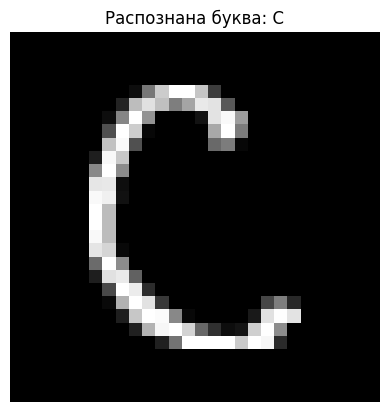

Правильное значение: C


In [ ]:
# Выбор нужной картинки из тестовой выборки
n = 41
x2 = x_test[n]

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x2 = np.expand_dims(x2, axis=0)

# Проверка формы данных
print(x2.shape)

# Предсказываем выбранную картинку
prediction2 = model.predict(x2)

# Вывод результата - вектор из 26 чисел
print(f'Вектор результата на 26 выходных нейронах: {prediction2}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred2 = np.argmax(prediction2)

# Отображение картинки
plt.imshow(x2.reshape(28, 28), cmap='gray')  # Преобразование в 2D массив 28x28
plt.title(f'Распознана буква: {word_dict[pred2]}')
plt.axis('off')  # Отключение осей для лучшего отображения
plt.show()

print(f'Правильное значение: {word_dict[np.argmax(y_test[n])]}')

А теперь, попробуем создать подобное изображение в Photoshop и проверим, как на него отреагирует наша сеть

test_image.png

In [ ]:
from PIL import Image

# Загрузка изображения с буквой
image_path = 'test_image.png'  # Укажите путь к вашему изображению
image = Image.open(image_path).convert('L')  # Преобразование в оттенки серого

# Преобразование изображения в массив numpy
test_image = np.array(image)

# Проверка формы данных
print(f'Форма изображения: {test_image.shape}')

# Изменение формы данных для модели
x_img = np.expand_dims(test_image, axis=0)  # Добавляем размерность для батча

# Проверка формы данных
print(f'Форма данных для предсказания: {x_img.shape}')

# Изменение формы тензора
x_img = x_img.reshape((1, 28 * 28))

# Нормализация изображения
x_img = x_img.astype('float32') / 255

# Предсказываем выбранную картинку
prediction3 = model.predict(x_img)

# Вывод результата - вектор из 26 чисел
print(f'Вектор результата на 26 выходных нейронах: {prediction3}')

# Получение и вывод индекса самого большого элемента (это значение буквы, которую распознала сеть)
pred3 = np.argmax(prediction3)

# Отображение картинки
plt.imshow(test_image, cmap='gray')  # Преобразование в 2D массив 28x28
plt.title(f'Распознана буква: {word_dict[pred3]}')
plt.axis('off')  # Отключение осей для лучшего отображения
plt.show()

print(f'Правильное значение: H')

FileNotFoundError: [Errno 2] No such file or directory: 'test_image.png'